In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'C:\Users\ASUS\Desktop\PythonProjects\8_important_projects\Customer_segmentation\Dataset\OnlineRetail.csv',encoding='unicode_escape')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
(df.isnull().sum()/df.shape[0])*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [12]:
df.isnull().sum().sum()

136534

In [13]:
(df.isnull().sum().sum()/df.shape[0]*df.shape[1])*100

201.5600405234089

In [18]:
df.duplicated().sum()

5268

In [22]:
df.drop_duplicates(keep='first',inplace=True)

In [23]:
df.duplicated().sum()

0

In [24]:
df.dropna(inplace=True)

In [25]:
df.shape

(401604, 8)

In [31]:
df["InvoiceNo"].dtype

dtype('O')

In [35]:
# for i in df.select_dtypes(include="object").columns:
#     print(df[i].value_counts())
#     print("***"*10)
df["InvoiceNo"].value_counts()

InvoiceNo
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C560912      1
560913       1
560917       1
572879       1
553049       1
Name: count, Length: 22190, dtype: int64

In [36]:
# Step 1: Convert to numeric, replacing garbage with NaN
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')

# Step 2: Drop rows with NaN values
df = df.dropna(subset=['InvoiceNo'])

# Step 3: Convert the column to integers
df['InvoiceNo'] = df['InvoiceNo'].astype(int)

print(df)

        InvoiceNo StockCode                          Description  Quantity  \
0          536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365     71053                  WHITE METAL LANTERN         6   
2          536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...       ...                                  ...       ...   
541904     581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905     581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906     581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907     581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country 

In [37]:
df.shape

(392732, 8)

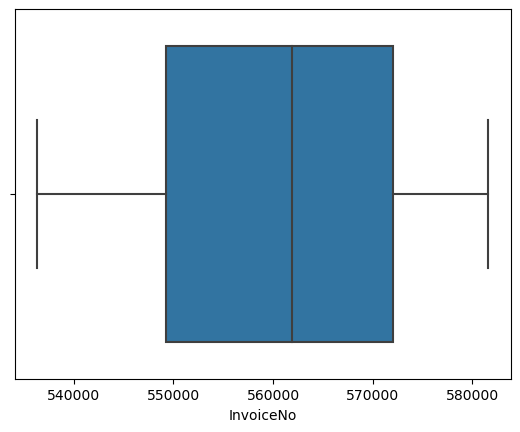

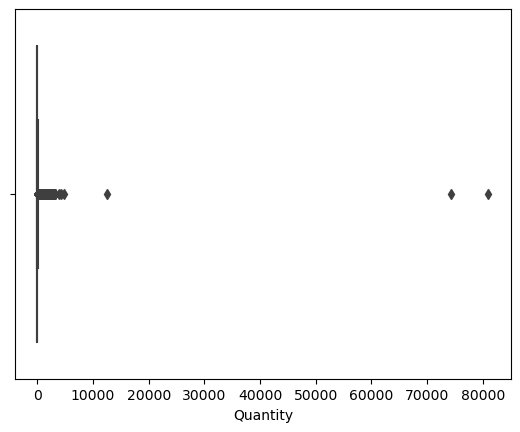

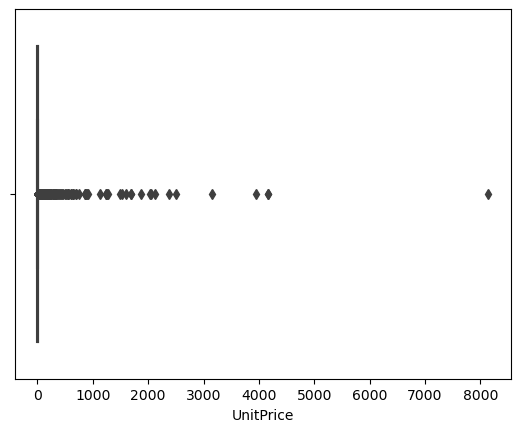

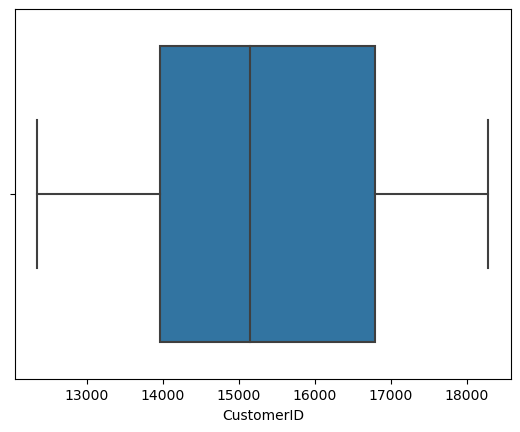

In [39]:
# box plot
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()


In [40]:
def Min_max(col):
    q1,q3 = np.percentile(col, [25,75])
    iqr = q3 - q1
    min_range = q1 - (1.5 * iqr)
    max_range = q3 + (1.5 * iqr)
    return min_range,max_range

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  int32  
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 25.5+ MB


In [44]:
for i in ['InvoiceNo','Quantity','UnitPrice', 'CustomerID']:
    min_range,max_range = Min_max(df[i])
    df[i] = np.where(df[i] < min_range, min_range, df[i])
    df[i] = np.where(df[i] > max_range, max_range, df[i])

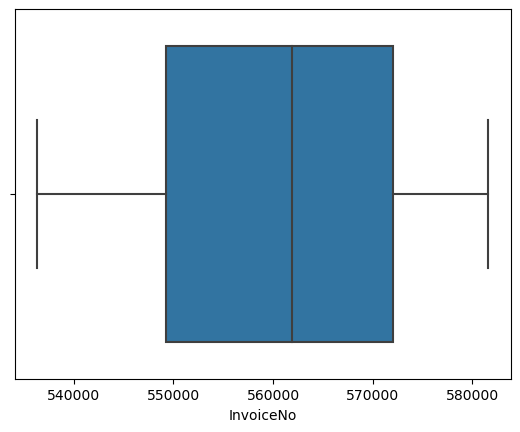

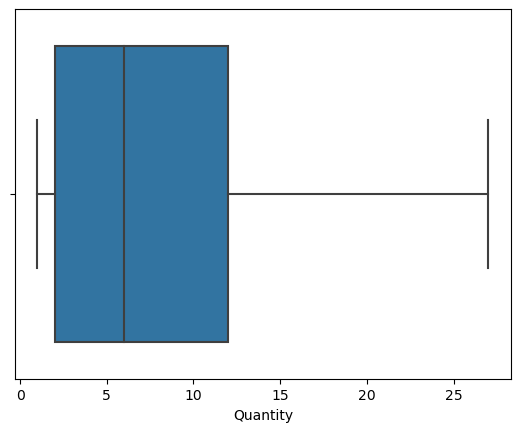

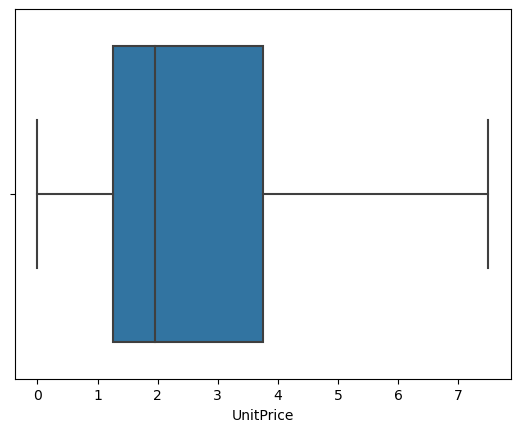

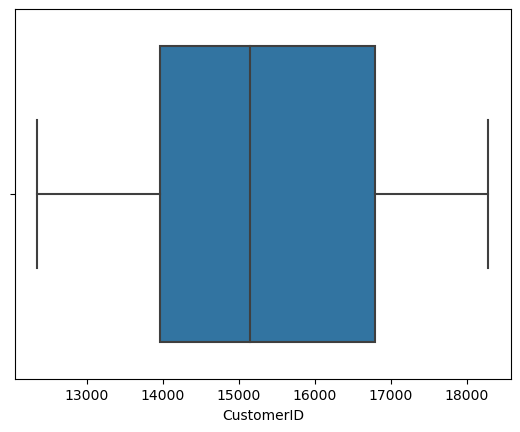

In [45]:
for i in ['InvoiceNo','Quantity','UnitPrice', 'CustomerID']:
    sns.boxplot(data=df,x=i)
    plt.show()

In [46]:
df.shape

(392732, 8)